### Finding artificial genomes ancestry throught k-nearest neighbor algorithm

In [67]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

### Importing data

In [68]:
real_df = pd.read_csv('./data/REAL.hapt', delimiter = ' ')
labels_df = pd.read_csv('./data/REAL.tsv', header = 0, sep = '\t')
target_df = pd.read_csv('./data/WGAN.hapt', delimiter = ' ')

In [69]:
## Pruning data to avoir running out of memory

In [70]:
prun_until = 1000
#real_df = real_df[0:prun_until]
#labels_df = labels_df
#target_df = target_df[prun_until]"""

In [71]:
real_df = real_df.sample(n=prun_until)
target_df = target_df.sample(n=prun_until)

In [72]:
# Remove the last two characters from the sequence keys
real_df.iloc[:, 1] = real_df.iloc[:, 1].astype(str).str[:-2]
real_df = real_df.merge(labels_df[['Sample name','Superpopulation code']], left_on=real_df.iloc[:, 1], right_on='Sample name', how='inner')
real_df['Superpopulation code'].replace({
    'EUR': 0,
    'EAS': 1,
    'AMR': 2,
    'SAS': 3,
    'EUR,AFR': 4,
    'AFR': 5
}, inplace=True)

In [73]:
labels_df.head()
len(real_df)

1000

In [74]:
real_df.head()

,Type,Sample,0,1,2,3,4,5,6,7,...,9992,9993,9994,9995,9996,9997,9998,9999,Sample name,Superpopulation code
0,Real,HG03631,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,HG03631,3
1,Real,HG03159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,HG03159,5
2,Real,NA19457,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,NA19457,5
3,Real,NA19457,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NA19457,5
4,Real,HG04014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,HG04014,3


In [75]:
target_df.head()

,Type,Sample,0,1,2,3,4,5,6,7,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
494,AG,AG494,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
973,AG,AG973,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4063,AG,AG4063,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,AG,AG40,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3317,AG,AG3317,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
real_df.sample(n=10)

,Type,Sample,0,1,2,3,4,5,6,7,...,9992,9993,9994,9995,9996,9997,9998,9999,Sample name,Superpopulation code
386,Real,HG00308,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,HG00308,0
482,Real,HG04152,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,HG04152,3
610,Real,HG04003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,HG04003,3
537,Real,HG03976,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,HG03976,3
846,Real,HG00346,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,HG00346,0
676,Real,NA18934,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NA18934,5
293,Real,NA19661,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NA19661,2
472,Real,NA20756,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NA20756,0
946,Real,HG00366,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,HG00366,0
294,Real,NA19347,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NA19347,5


In [77]:
X = real_df.iloc[:, 3:10002]
print(X.shape)

(1000, 9999)


In [78]:
y = real_df.iloc[:, 10003:10004]
y = np.reshape(y, (prun_until,))
print(y.shape)

(1000,)


In [79]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X)
mse = mean_squared_error(y, train_preds)
rmse = sqrt(mse)
rmse

0.7619419633774973

In [81]:
ag_preds = knn_model.predict(target_df.iloc[:, 3:10002])

In [82]:
ag_preds = np.rint(ag_preds)
print(ag_preds[0:10])

[1. 1. 3. 1. 3. 1. 3. 1. 3. 5.]


In [83]:
target_df["predicted"] = ag_preds
target_df.head()

,Type,Sample,0,1,2,3,4,5,6,7,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,predicted
494,AG,AG494,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1.0
973,AG,AG973,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4063,AG,AG4063,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
40,AG,AG40,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1.0
3317,AG,AG3317,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.0


In [84]:
#target_df['predicted'].replace({
#    0.0: 'EUR',
#    1.0: 'EAS',
#    2.0: 'AMR',
#    3.0: 'SAS',
#    4.0: 'EUR,AFR',
#    5.0: 'AFR'
#}, inplace=True)
#target_df.head()

In [93]:
num_components=3
pca=PCA(n_components=num_components)

pca_result = pca.fit_transform(real_df.iloc[:, 3:10002])
pca_targets = pca.transform(target_df.iloc[:, 3:10002])

[[-9.49400929 -3.24038257 -4.13330194]
 [11.3176778  -5.9120056  -1.62736498]
 [10.90455335  0.13391416  3.40086935]
 ...
 [13.80203938 -3.31368221  5.68285433]
 [12.27333802 -1.6486515   0.5414738 ]
 [ 3.29093202  5.78855219 -0.54735332]]


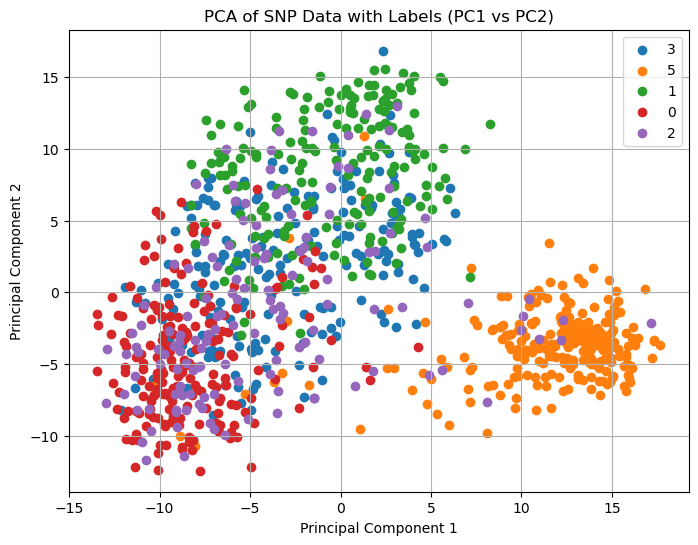

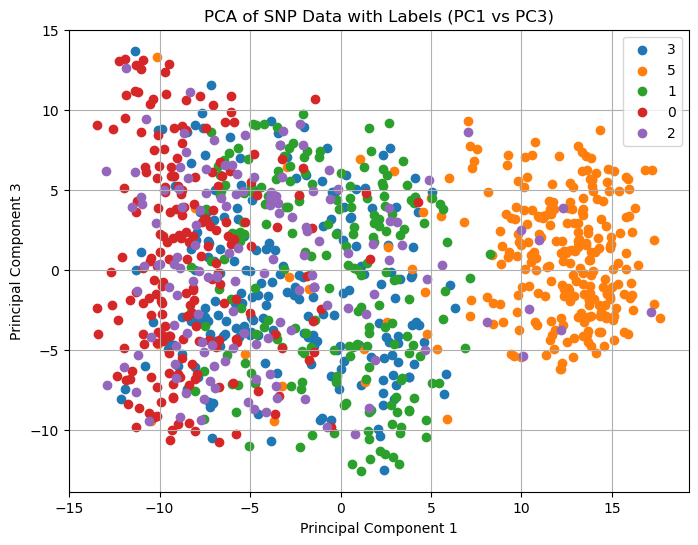

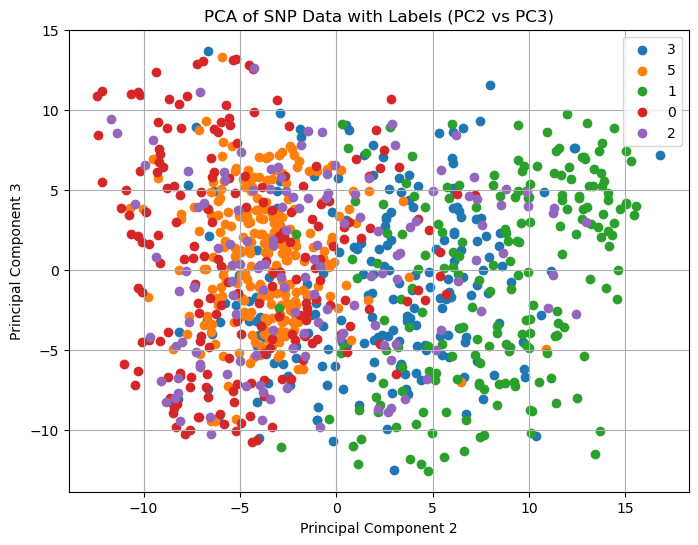

In [90]:
# Loop through each pair of principal components for plotting
for i in range(num_components):
    for j in range(i + 1, num_components):
        plt.figure(figsize=(8, 6))
        for label in real_df['Superpopulation code'].unique():
            subset = real_df[real_df['Superpopulation code'] == label]
            plt.scatter(pca_result[subset.index, i], pca_result[subset.index, j], label=label)
        
        #for label in target_df['predicted'].unique():
        #    target_subset = target_df[target_df['predicted'] == label]
        #    plt.scatter(pca_targets[target_subset.index, i], pca_targets[target_subset.index, j], label=label)
        
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.title(f'PCA of SNP Data with Labels (PC{i+1} vs PC{j+1})')
        plt.legend()
        plt.grid(True)
        plt.show()